#Story


---





หนุ่มน้อย มัธยมปลาย ที่ชื่นชอบในเรี่องของดวงชะตาและโชค เป็นอย่างมาก ได้มีความกังวลเกี่ยวกับการสอบของตนเองที่อาจได้น้อยเกินกว่าที่คาดเอาไว้ จึงต้องการทำโปรเจกเพื่อหาสิ่งต่างๆ ที่ทำให้เพิ่มโอกาสในการเพิ่มคะแนนสอบสูงขึ้น นอกเหนือจาก การอ่านหนังสือ จึงได้จัดเก็บข้อมูลเที่เกี่ยวข้องกับผลคะแนนสอบทั้งปัจจัยทางวิชาการ และ ปัจจัยในด้านโหราศาสตร์ เทียบกับคะแนนสอบของนักเรียนชั้น มัธยมศึกษาปีที่ 6 ในโรงเรียนจำนวน 500 คน
และนำมาอ้างอิงถึงของมูลของนักเรียนกลุ่มนี้ว่าจะได้คะแนนมากน้อยเพียงใด

*** แต่ว่า เรื่องโหราศาสตร์จะเกี่ยวข้องกับคะแนนสอบจริงหรือมั้ย?***



ฟิลด์ข้อมูล (Fields) ที่เก็บข้อมูลของนักเรียน ได้แก่

Fields | meaning
--- | ---
 `Sleep_Hours`| เวลานอนก่อนเข้าสอบ
 `Stepping_foot`| ขาข้างที่เข้าห้องสอบ
 `Worship_location` |สถานที่ขอพรก่อนสอบ
 `Is_single`| มีแฟนหรือไม่
 `GPAX`| เกรดเฉลี่ยสะสม
 `Attendance_percentage` | เปอร์เซ็นต์การเข้าเรียน
 `Practice_hours` |เวลาเฉลี่ยในการซ้อมทำโจทย์
 `Pen_color` |สีของปากกาที่ใช้ในห้องสอบ
 `Food_choice` | อาหารที่รับประทานก่อนสอบ
 `Exam_Score` | คะแนนสอบ


#1  Data processing

---


ในการทำงานกับข้อมูลการประมวลผลข้อมูล (Data Processing) เป็นส่วนสำคัญอย่างมากที่ทำให้ผลลัพธ์ของการคาดการณ์คะแนนสอบนั้นแม่นยำยิ่งขึ้น


In [ ]:
#ทำการ ใช้คำสั่ง import libary ที่จะนำมาใช้ในการจัดการกับข้อมูลและ
import pandas as pd #สำหรับการจัดการกับข้อมูล
import matplotlib.pyplot as plt #ทำกราฟเส้นตรง
import seaborn as sns #ทำmatrix correlation


In [ ]:
#โหลดข้อมูลที่รวบรวบมา
file_url = 'https://drive.google.com/uc?id=1rhbgBBLwIoZZztKIBwwTYtkNNu0idRY6'
df = pd.read_csv(file_url)


## 1.1 Preprocessing


---
ก่อนที่เราจะสามารถวิเคราะห์ข้อมูลได้จะต้องมีการตรวจสอบข้อมูลที่มีก่อน โดยสิ่งที่สังเกตุมีดังนี้
*   ประเภทของข้อมูล
*   ความสมบูรณ์ของข้อมูล
*   ข้อมูลทางสถิติ






In [ ]:
#ดูของสรุปต่างของข้อมูลชุดนี้
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sleep_Hours            500 non-null    float64
 1   Stepping_foot          500 non-null    object 
 2   Worship_location       500 non-null    object 
 3   Is_single              500 non-null    object 
 4   GPAX                   500 non-null    float64
 5   Attendance_percentage  500 non-null    float64
 6   Practice_hours         500 non-null    float64
 7   Pen_color              500 non-null    object 
 8   Food_choice            500 non-null    object 
 9   Exam_Score             500 non-null    float64
dtypes: float64(5), object(5)
memory usage: 39.2+ KB


จากข้อมูลที่มีอยู่จะเห็นได้ว่ามีข้อมูลที่ประเภท object อยู่หลายฟิลด์ ซึ่งจะไม่สามารถในไปคำนวณทางสถิติจะมี


*   Stepping_foot
*   Worship_location
*   Is_single
*   Pen_color
*   Food_choice

*สามารถลองนำโด้ดด้างล่างไป run ดูได้

```
# df['Stepping_foot'].describe() #สำหรับข้อมูลที่ไม่ใช่ตัวเลข
```


```
# df['Sleep_Hours'].describe() #สำหรับข้อมูลตัวเลข
```










In [ ]:
df['Sleep_Hours'].describe()

,Sleep_Hours
count,500.000000
mean,7.536000
std,1.503737
min,4.000000
25%,7.000000
50%,8.000000
75%,9.000000
max,11.000000


In [ ]:
#หาค่าทางสถิติของข้อมูลที่เป็นตัวเลข
df.describe()

,Sleep_Hours,GPAX,Attendance_percentage,Practice_hours,Exam_Score
count,500.000000,500.000000,500.00000,500.000000,500.000000
mean,7.536000,3.271080,48.18396,2.482040,48.216880
std,1.503737,0.403671,28.67141,1.986675,20.502717
min,4.000000,1.990000,0.02000,0.010000,0.000000
25%,7.000000,2.990000,23.30250,1.100000,33.377500
50%,8.000000,3.320000,46.66000,1.875000,47.630000
75%,9.000000,3.600000,73.06500,3.365000,62.315000
max,11.000000,3.970000,99.58000,10.000000,100.000000


In [ ]:
# ยกตัวอย่างการแสดงค่าใน ฟิลด์ที่เก็บเป็นข้อความ
print(df["Pen_color"].unique())
#แสดงผลจำนวนข้อมูลในฟิลด์ต่างๆ ที่ไม่ใช่ตัวเลขทั้งหมด
for col in df.columns:
  if df[col].dtype == 'object':
    display(df[col].value_counts())

    #print(col, "have element" ) # สำหรับดูข้อมูลที่ต่างกันในแต่ละฟิลด์
    #print(df[col].unique(), end= "\n\n")

['Black' 'Yellow' 'Green' 'Red' 'Blue']


,count
Stepping_foot,
Left,303
Right,197


,count
Worship_location,
Two Kings Monuments,210
Erawan Shrine,81
No specific location,71
Ganesha temple,70
Bangkok City Pillar Shrine,68


,count
Is_single,
No,256
Yes,244


,count
Pen_color,
Yellow,193
Red,84
Black,81
Green,74
Blue,68


,count
Food_choice,
Pork,163
Truffle,92
Banana,83
Grass Jelly,82
Egg,80


Box Plot สำหรับแสดงการกระจายของข้อมูลในฟิลด์ต่างๆ

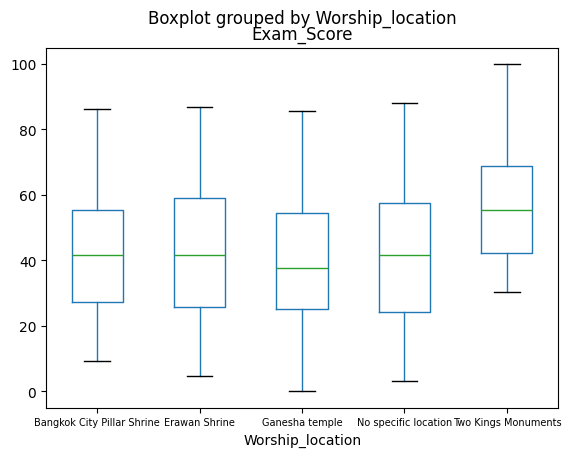

In [ ]:
# กราฟ Box plot สำหรับ worship_location กับ Exam_score
##กราฟ Box plot สำหรับ  worship_location กับ exam scoreโดยใช้ความถี่ของข้อมูล for propt
df.boxplot(column='Exam_Score', by='Worship_location', grid=False)
plt.xticks(fontsize=7)
plt.show()

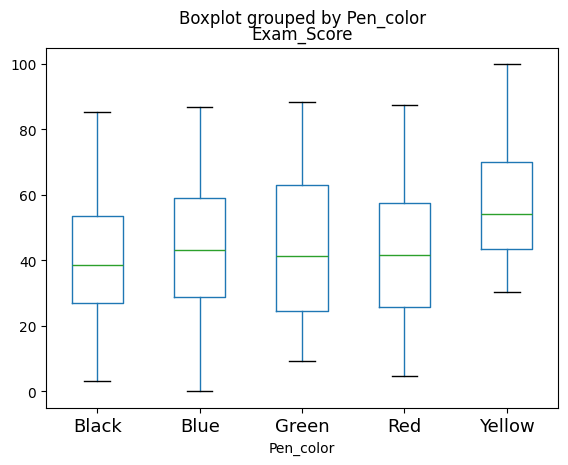

In [ ]:
# กราฟ Box plot สำหรับ Exam_score และ Pen_color
df.boxplot(column='Exam_Score', by='Pen_color', grid=False)
plt.xticks(fontsize=13)
plt.show()

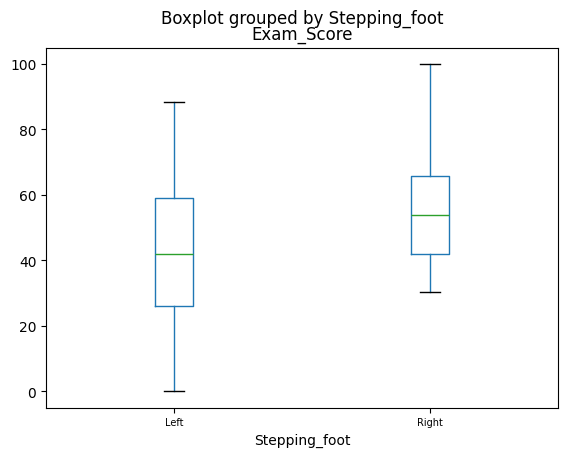

In [ ]:
# prompt: # กราฟ Box plot สำหรับ step foot AND exam score

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataframe.
file_url = 'https://drive.google.com/uc?id=1rhbgBBLwIoZZztKIBwwTYtkNNu0idRY6'
df = pd.read_csv(file_url)

# Create the box plot.
df.boxplot(column='Exam_Score', by='Stepping_foot', grid=False)
plt.xticks(fontsize=7)
plt.show()

##1.2 Data Augmentation


---



กลุ่มของนักเรียนได้มีการคิดว่าข้อมูลที่ไม่ใช่ตัวเลขสามารถเปลี่ยนเป็นค่าเฉลี่ยได้ แต่ว่าเพื่อไม่ให้ข้อมูลเดิมเสียหายเราจึงจะใช้วิธี Data Augmentation เพื่อให้ข้อมูลเดิมไม่เสียหาย


In [ ]:
# ทำซ้ำข้อมูลนักเรียนสำหรับการเปลี่ยนแปลงข้อมูล
data = df.copy()

display(data.groupby('Pen_color')['Exam_Score'].mean())
data.info()

,Exam_Score
Pen_color,
Black,40.291481
Blue,45.063235
Green,43.323378
Red,41.327500
Yellow,57.528964


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sleep_Hours            500 non-null    float64
 1   Stepping_foot          500 non-null    object 
 2   Worship_location       500 non-null    object 
 3   Is_single              500 non-null    object 
 4   GPAX                   500 non-null    float64
 5   Attendance_percentage  500 non-null    float64
 6   Practice_hours         500 non-null    float64
 7   Pen_color              500 non-null    object 
 8   Food_choice            500 non-null    object 
 9   Exam_Score             500 non-null    float64
dtypes: float64(5), object(5)
memory usage: 39.2+ KB


In [ ]:
#เปลี่ยนแปลงข้อมูลเป็นค่าเฉลี่ยของแต่ละข้อมูลที่ต่างกันในแต่ละฟิลด์
for col in ['Stepping_foot', 'Pen_color', 'Worship_location', 'Is_single', 'Food_choice']:
    data[col] = data[col].map(data.groupby(col)['Exam_Score'].mean().to_dict())

display(data)


,Sleep_Hours,Stepping_foot,Worship_location,Is_single,GPAX,Attendance_percentage,Practice_hours,Pen_color,Food_choice,Exam_Score
0,9.0,56.189898,40.870282,45.624688,3.47,46.47,4.30,40.291481,45.801840,43.52
1,7.0,56.189898,57.340952,45.624688,3.00,82.07,1.78,57.528964,45.801840,49.70
2,9.0,43.033102,42.424706,50.936557,2.98,61.45,3.50,43.323378,45.801840,61.72
3,9.0,56.189898,57.340952,45.624688,3.71,83.22,0.56,57.528964,45.801840,47.27
4,6.0,43.033102,57.340952,45.624688,3.46,49.40,2.52,57.528964,50.600000,48.91
...,...,...,...,...,...,...,...,...,...,...
495,7.0,43.033102,42.962963,45.624688,2.60,46.26,1.40,41.327500,45.801840,10.06
496,8.0,43.033102,42.424706,45.624688,3.92,78.51,1.27,45.063235,45.801840,58.28
497,7.0,43.033102,57.340952,50.936557,3.15,82.16,4.21,43.323378,48.994337,67.87
498,8.0,43.033102,57.340952,45.624688,3.85,55.45,5.07,45.063235,48.167500,84.91


In [ ]:
#ตรวจสอบข้อมูลหลังจากเปลี่ยนแปลงข้อมูลแล้ว
data.describe()

,Sleep_Hours,Stepping_foot,Worship_location,Is_single,GPAX,Attendance_percentage,Practice_hours,Pen_color,Food_choice,Exam_Score
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,7.536000,48.216880,48.216880,48.216880,3.271080,48.18396,2.482040,48.216880,48.216880,48.216880
std,1.503737,6.435307,7.825108,2.657829,0.403671,28.67141,1.986675,7.525375,1.835709,20.502717
min,4.000000,43.033102,40.002429,45.624688,1.990000,0.02000,0.010000,40.291481,45.801840,0.000000
25%,7.000000,43.033102,40.870282,45.624688,2.990000,23.30250,1.100000,41.327500,45.801840,33.377500
50%,8.000000,43.033102,42.962963,45.624688,3.320000,46.66000,1.875000,45.063235,48.994337,47.630000
75%,9.000000,56.189898,57.340952,50.936557,3.600000,73.06500,3.365000,57.528964,49.605000,62.315000
max,11.000000,56.189898,57.340952,50.936557,3.970000,99.58000,10.000000,57.528964,50.600000,100.000000


#2 Data visualization


---



 ![image.png](https://miro.medium.com/v2/resize:fit:932/1*Qz_gwy4ZaSZuOpl3IyO2HA.png)


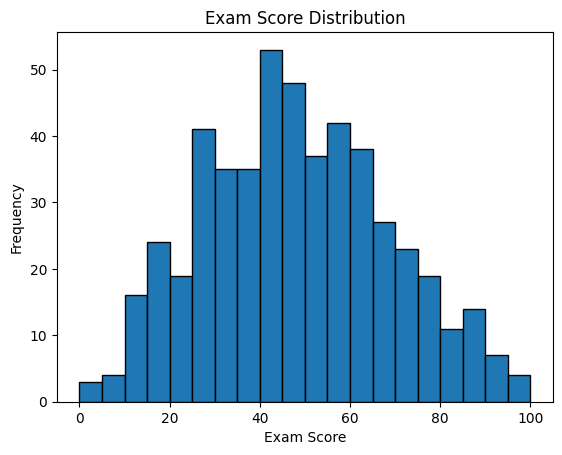

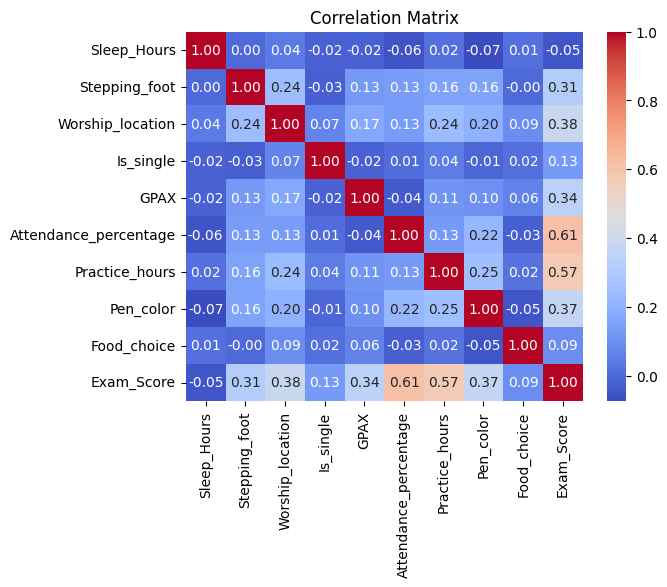

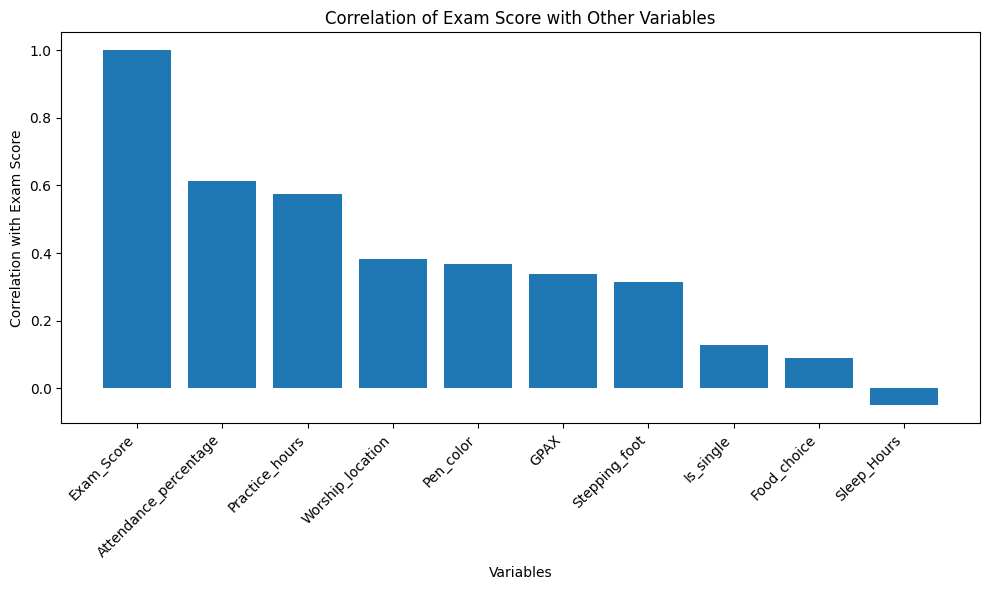

In [ ]:
# print Exam_Score distribution by matplotlib

plt.hist(data['Exam_Score'], bins=20, edgecolor='black')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Exam Score Distribution')
plt.show()

# visualize the correlation matrix
# ถ้าไม่แปลงเป็นตัวเลขก่อนบรรทัดด้านล่างจะ error
#correlation_matrix = df.corr()
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# promptaa: i want correlation matrix exam_score vs every single variable and plot

# Calculate the correlation matrix with Exam_Score
correlation_with_exam_score = data.corr()['Exam_Score']

# Sort the correlations in descending order
correlation_with_exam_score = correlation_with_exam_score.sort_values(ascending=False)

# Print the correlation matrix
#print(correlation_with_exam_score)

# Plot the correlation matrix
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(correlation_with_exam_score.index, correlation_with_exam_score.values)
plt.xlabel('Variables')
plt.ylabel('Correlation with Exam Score')
plt.title('Correlation of Exam Score with Other Variables')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

##Exercise 01
ลอง promt ในGemini ด้วยข้อความนี้  **prompt: pie graph กับ ข้อมูล sleep hours พร้อมตาราง เปอร์เซ็น ในแต่ละชั่วโมง**

#3 Prediction




## 3.1 Linear Regression


---


หนึ่งในโมเดลของ `Supervised Learning `ที่ใช้ในการทำนายค่าต่อเนื่อง โดย Linear Regression จะใช้สมการเส้นตรง (linear equation) เพื่อจับ ความสัมพันธ์ระหว่างตัวแปรอิสระ (Features) และตัวแปรตาม (Target)  หลักการของ Linear Regression คือการค้นหาเส้นตรงที่เหมาะสมที่สุดในการแสดงความสัมพันธ์ระหว่างข้อมูล





##3.2 libary for traning data set


---



In [ ]:
from sklearn.linear_model import LinearRegression #สำหรับการทำmodel ที่จะพยากรณ์คะแนนสอบ
from sklearn.model_selection import train_test_split #แยกข้อมูลสำหรับการทดสอบประสิทธิภาพของโมเดล
from sklearn.metrics import root_mean_squared_error #คำนวณค่า RMSE สำหรับการทดสอบประสิทธิภาพ

## 3.3 Model Testing and Evaluation


---


การแยกข้อมูลสำหรับตรวจสอบประสิทธิภาพของโมเดล

+ค่าของ Root mean square error (RMSE) ที่ดีควรค่าใกล้ 0 มากที่สุด




## Exercise 2


---


ทำการเทรนโมเดล linear regression ระหว่าง exam_score กับ GPAX แสดงเป็นกราฟ และ สังเกตุ ค่าที่เกี่ยวข้อง (ความชัน , จุดตัดแกนy)
และ เทรนโมเดลกับข้อมูลที่ผ่านการทำ Data Transformation  [Data Augmentation](#scrollTo=O6oiq3A_uYu2) ในหัวข้อที่ 1.2



---



Coefficients: [17.21736051]
Intercept: -7.821289922218675
RMSE: 18.509952184216065


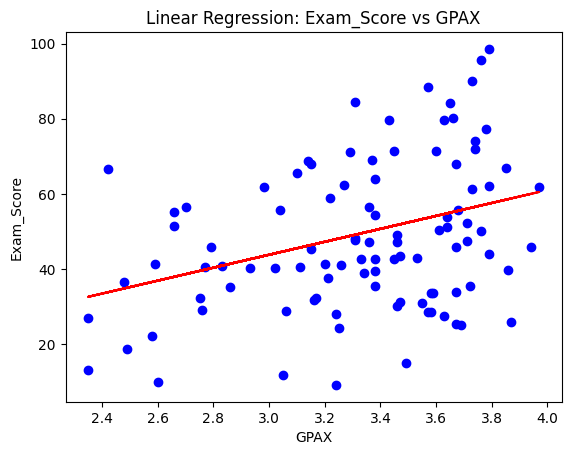

In [ ]:
# prompt: ทำ linear regression ระหว่าง final_score กับ GPAX แสดงค่าที่เกี่ยวข้อง

# Assuming 'Exam_Score' is the final score and 'GPAX' is the GPAX

X = data[['GPAX']]  # Independent variable (GPAX)
y = data['Exam_Score']  # Dependent variable (Exam_Score)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)

# Print the model's coefficients (slope and intercept)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Print the RMSE
print("RMSE:", rmse)

# Visualize the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('GPAX')
plt.ylabel('Exam_Score')
plt.title('Linear Regression: Exam_Score vs GPAX')
plt.show()

# You can also print the R-squared value to measure the goodness of fit
# print("R-squared:", model.score(X_test, y_test))

Root Mean Squared Error: 18.509952184216065


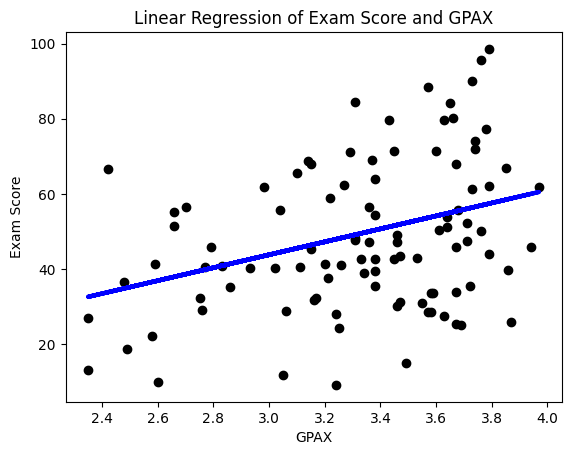

In [ ]:


X = data[['GPAX']]
y = data['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_GPAX = LinearRegression()
model_GPAX.fit(X_train, y_train)

y_predGPAX = model_GPAX.predict(X_test)

print('Root Mean Squared Error:', root_mean_squared_error(y_test, y_predGPAX))

# plot the linear regression
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_predGPAX, color='blue', linewidth=3)
plt.xlabel('GPAX')
plt.ylabel('Exam Score')
plt.title('Linear Regression of Exam Score and GPAX')
plt.show()

In [ ]:
#predict Stepping_foot
#create visualization for Stepping_foot and create Stepping_foot_dict
display(df.groupby('Stepping_foot')['Exam_Score'].mean())
Stepping_foot_dict = {}
Stepping_foot_dict['Left'] = 43.033102
Stepping_foot_dict['Right'] = 56.189898

result = model_Stepping_foot.predict([[Stepping_foot_dict['Right']]])
print(result)

,Exam_Score
Stepping_foot,
Left,43.033102
Right,56.189898


[56.91198625]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#predict Food_choice
#create visualization for Food_choice and create Food_choice_dict
display(df.groupby('Food_choice')['Exam_Score'].mean())
Food_choice_dict = {}
Food_choice_dict['Banana'] = 48.994337
Food_choice_dict['Egg'] = 48.167500
Food_choice_dict['Grass Jelly	'] = 49.605000
Food_choice_dict['Pork'] = 45.801840
Food_choice_dict['Truffle'] = 50.600000

result = model_Food_choice.predict([[Food_choice_dict['Pork']]])
print(result)

,Exam_Score
Food_choice,
Banana,48.994337
Egg,48.167500
Grass Jelly,49.605000
Pork,45.801840
Truffle,50.600000


[44.68653506]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Attendance_percentage    400
dtype: int64
Root Mean Squared Error: 14.66897914119492


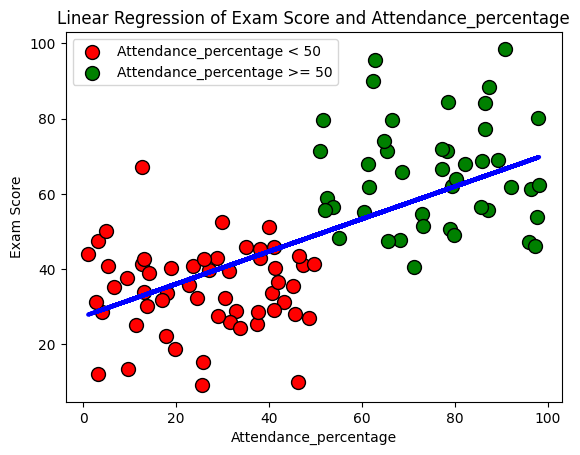

In [ ]:
# linear regression of Exam_Score and Attendance_percentage
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data[['Attendance_percentage']]
y = data['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.count())
model_Attendance_percentage = LinearRegression()
model_Attendance_percentage.fit(X_train, y_train)

y_pred = model_Attendance_percentage.predict(X_test)

print('Root Mean Squared Error:', root_mean_squared_error(y_test, y_pred))
# Plot the linear regression line
plt.plot(X_test, y_pred, color='blue', linewidth=3)

# Highlight points where Attendance_percentage < 50 and >= 50
below_50 = X_test[X_test['Attendance_percentage'] < 50]
above_50 = X_test[X_test['Attendance_percentage'] >= 50]

# Plot scatter points
plt.scatter(below_50, y_test.loc[below_50.index], color='red', edgecolors='black', label='Attendance_percentage < 50', s=100, marker='o')
plt.scatter(above_50, y_test.loc[above_50.index], color='green', edgecolors='black', label='Attendance_percentage >= 50', s=100, marker='o')

# Labels and title
plt.xlabel('Attendance_percentage')
plt.ylabel('Exam Score')
plt.title('Linear Regression of Exam Score and Attendance_percentage')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
#predict Attendance_percentage
result = model_Attendance_percentage.predict([[80]])
print(result)

[61.95519581]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


X shape: (500, 9)
First five elements of x are:
    Sleep_Hours  Stepping_foot  Worship_location  Is_single  GPAX  \
0          9.0      56.189898         40.870282  45.624688  3.47   
1          7.0      56.189898         57.340952  45.624688  3.00   
2          9.0      43.033102         42.424706  50.936557  2.98   
3          9.0      56.189898         57.340952  45.624688  3.71   
4          6.0      43.033102         57.340952  45.624688  3.46   

   Attendance_percentage  Practice_hours  Pen_color  Food_choice  
0                  46.47            4.30  40.291481     45.80184  
1                  82.07            1.78  57.528964     45.80184  
2                  61.45            3.50  43.323378     45.80184  
3                  83.22            0.56  57.528964     45.80184  
4                  49.40            2.52  57.528964     50.60000  
y shape: (500,)
First five elements of y are:
 0    43.52
1    49.70
2    61.72
3    47.27
4    48.91
Name: Exam_Score, dtype: float64
Root 

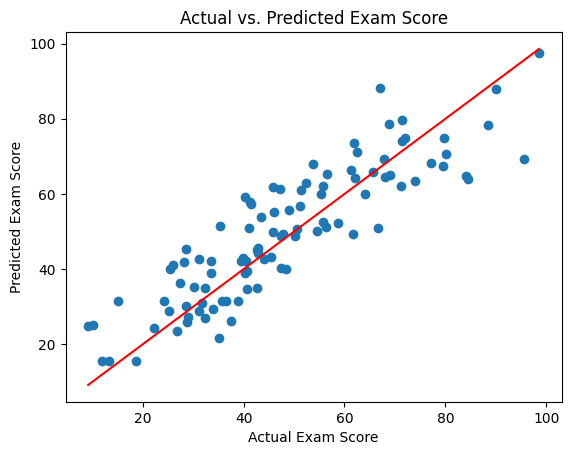

"importances = pd.DataFrame({'feature': X.columns, 'importance': model.coef_})\nimportances = importances.sort_values('importance', ascending=False)\n\nplt.figure(figsize=(10,6))\nsns.barplot(x='importance', y='feature', data=importances)\nplt.title('Feature Importances')\nplt.show()"

In [ ]:
# linear regression to predict Exam_Score in data with maltiple parametor to make it the most efficiancy

# Use all features for prediction
X = data.drop('Exam_Score', axis=1)
y = data['Exam_Score']

print(f"X shape: {X.shape}")
print("First five elements of x are:\n", X[:5])
print(f"y shape: {y.shape}")
print("First five elements of y are:\n", y[:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')

# Visualize the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs. Predicted Exam Score")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Add a diagonal line for reference
plt.show()


#Feature Importance
"""importances = pd.DataFrame({'feature': X.columns, 'importance': model.coef_})
importances = importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importances')
plt.show()"""

In [ ]:
  #predict Actual
display(df.groupby('Is_single')['Exam_Score'].mean())
Is_single_dict = {}
Is_single_dict['No'] = 45.624688
Is_single_dict['Yes'] = 50.936557
display(df.groupby('Food_choice')['Exam_Score'].mean())
Food_choice_dict = {}
Food_choice_dict['Banana'] = 48.994337
Food_choice_dict['Egg'] = 48.167500
Food_choice_dict['Grass Jelly'] = 49.605000
Food_choice_dict['Pork'] = 45.801840
Food_choice_dict['Truffle'] = 50.600000

"""
 #เป็นตัวแปรให้น้องกรอก เช่น
sleep_hour =  8  #[1-11]
stepping_Foot = 'left' #[left,right]"""


#[7.0],[Stepping_foot_dict['Right']],[Worship_location_dict['Two Kings Monuments']],[30],[45],[50],[50],[12],[4]
result = model.predict([[7.0,Stepping_foot_dict['Right'],Worship_location_dict['Two Kings Monuments']
                         ,Is_single_dict['Yes'],3.6,80,6,Pen_score_dict['Yellow']
                         ,Food_choice_dict['Truffle']]]) # 1.Sleep_Hours 2.Stepping_foot 3.Worship_location 4.Is_single 5.GPAX 6.Attendance_percentage 7.Practice_hours 8.Pen_color 9.Food_choice
print(result)

,Exam_Score
Is_single,
No,45.624688
Yes,50.936557


,Exam_Score
Food_choice,
Banana,48.994337
Egg,48.167500
Grass Jelly,49.605000
Pork,45.801840
Truffle,50.600000


[91.76257994]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


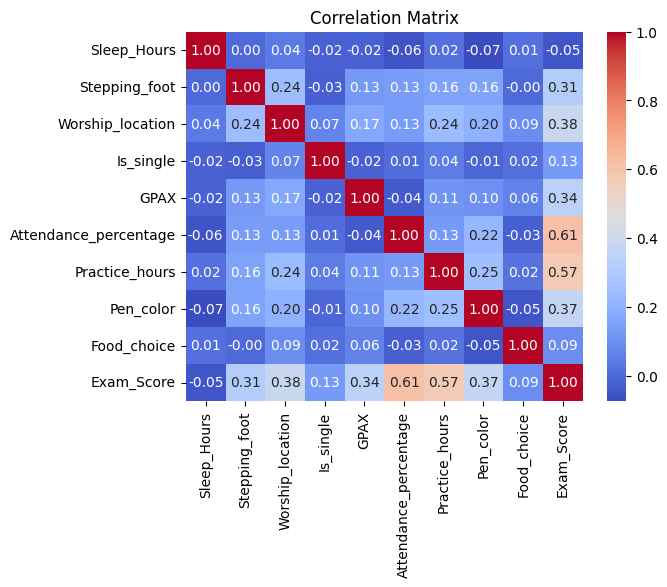

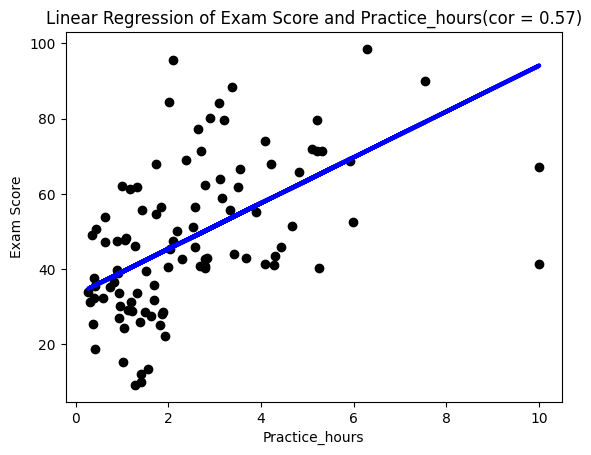

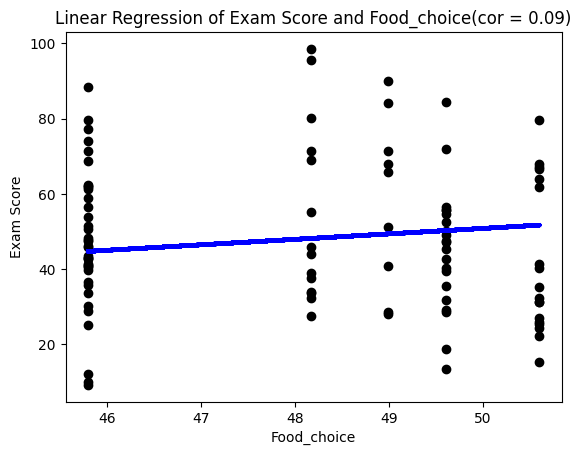

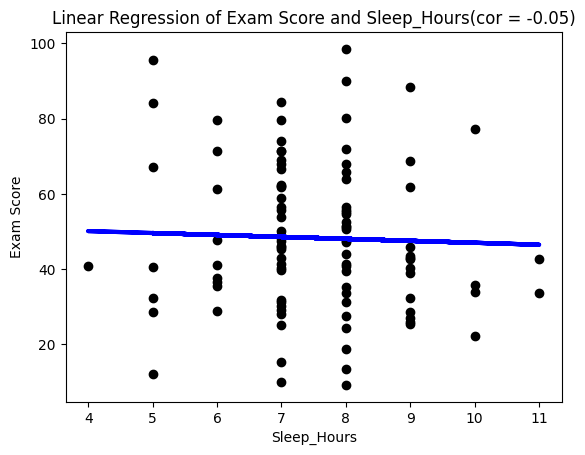

In [ ]:
#Compare ระหว่าง Correlation น้อยกับ Correlation มาก
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# plot result Practice_hour
plt.scatter(X_test_PH, y_test_PH, color='black')
plt.plot(X_test_PH, y_pred_PH, color='blue', linewidth=3)
plt.xlabel('Practice_hours')
plt.ylabel('Exam Score')
plt.title('Linear Regression of Exam Score and Practice_hours(cor = 0.57)')
plt.show()

# plot result Food_choice
plt.scatter(X_test_FC, y_test_FC, color='black')
plt.plot(X_test_FC, y_pred_FC, color='blue', linewidth=3)
plt.xlabel('Food_choice')
plt.ylabel('Exam Score')
plt.title('Linear Regression of Exam Score and Food_choice(cor = 0.09)')
plt.show()


#plot result Sleep_Hours(Negative correlation)
X = data[['Sleep_Hours']]
y = data['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_Sleep_Hours = LinearRegression()
model_Sleep_Hours.fit(X_train, y_train)

y_predSleep_Hours = model_Sleep_Hours.predict(X_test)

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_predSleep_Hours, color='blue', linewidth=3)
plt.xlabel('Sleep_Hours')
plt.ylabel('Exam Score')
plt.title('Linear Regression of Exam Score and Sleep_Hours(cor = -0.05)')
plt.show()

## 3.3 Predict


---


ทำนายผลคะแนน ด้วยข้อมูลของคุณเอง


# 4 Result


---



Root Mean Squared Error: 46.83470081750951


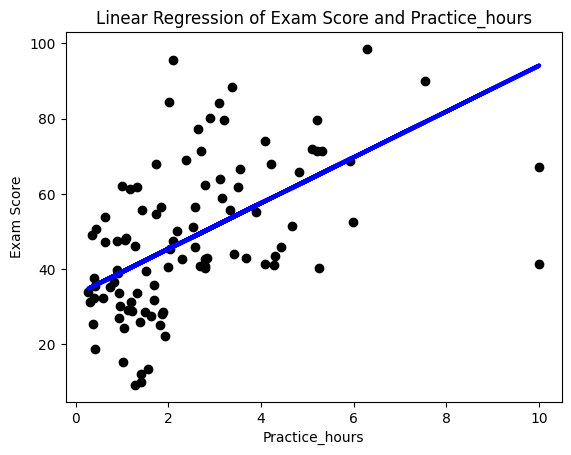

In [ ]:

X = data[['Practice_hours']]
y = data['Exam_Score']

X_train, X_test_PH, y_train, y_test_PH = train_test_split(X, y, test_size=0.2, random_state=42)

model_Practice_hours = LinearRegression()
model_Practice_hours.fit(X_train, y_train)

y_pred_PH = model_Practice_hours.predict(X_test_PH)

print('Root Mean Squared Error:', root_mean_squared_error(X_test_PH, y_pred_PH))
# plot the linear regression
plt.scatter(X_test_PH, y_test_PH, color='black')
plt.plot(X_test_PH, y_pred_PH, color='blue', linewidth=3)
plt.xlabel('Practice_hours')
plt.ylabel('Exam Score')
plt.title('Linear Regression of Exam Score and Practice_hours')
plt.show()




In [ ]:
#predict Examscore from Practice_hours
info = float(input("Enter your Practice hours hear: "))
if 0 <= info <= 10:
  result = model_Practice_hours.predict([[info]])
  print(f"Your Exam score is {result[0]}")
else:
  print("Your Practice hours is not in range")

Enter your Practice hours hear: 4
Your Exam score is 57.51744164259472


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Extra


---


multiple variable

X shape: (500, 9)
First five elements of x are:
    Sleep_Hours  Stepping_foot  Worship_location  Is_single  GPAX  \
0          9.0      56.189898         40.870282  45.624688  3.47   
1          7.0      56.189898         57.340952  45.624688  3.00   
2          9.0      43.033102         42.424706  50.936557  2.98   
3          9.0      56.189898         57.340952  45.624688  3.71   
4          6.0      43.033102         57.340952  45.624688  3.46   

   Attendance_percentage  Practice_hours  Pen_color  Food_choice  
0                  46.47            4.30  40.291481     45.80184  
1                  82.07            1.78  57.528964     45.80184  
2                  61.45            3.50  43.323378     45.80184  
3                  83.22            0.56  57.528964     45.80184  
4                  49.40            2.52  57.528964     50.60000  
y shape: (500,)
First five elements of y are:
 0    43.52
1    49.70
2    61.72
3    47.27
4    48.91
Name: Exam_Score, dtype: float64
Root 

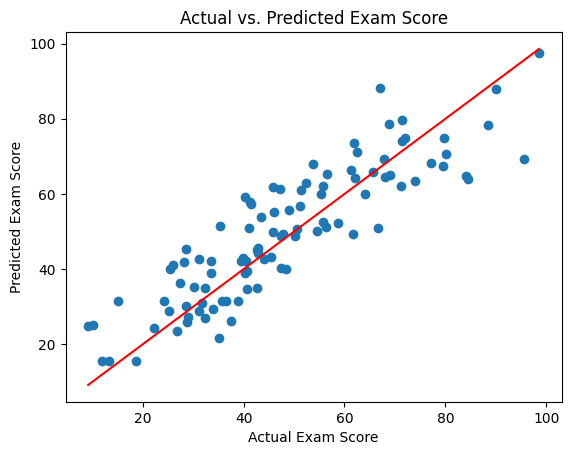

"importances = pd.DataFrame({'feature': X.columns, 'importance': model.coef_})\nimportances = importances.sort_values('importance', ascending=False)\n\nplt.figure(figsize=(10,6))\nsns.barplot(x='importance', y='feature', data=importances)\nplt.title('Feature Importances')\nplt.show()"

In [ ]:
# linear regression to predict Exam_Score in data with maltiple parametor to make it the most efficiancy

# Use all features for prediction
X = data.drop('Exam_Score', axis=1)
y = data['Exam_Score']

print(f"X shape: {X.shape}")
print("First five elements of x are:\n", X[:5])
print(f"y shape: {y.shape}")
print("First five elements of y are:\n", y[:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')

# Visualize the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs. Predicted Exam Score")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Add a diagonal line for reference
plt.show()


#Feature Importance
"""importances = pd.DataFrame({'feature': X.columns, 'importance': model.coef_})
importances = importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importances')
plt.show()"""

In [ ]:
display(df.groupby('Is_single')['Exam_Score'].mean())
Is_single_dict = {}
Is_single_dict['No'] = 45.624688
Is_single_dict['Yes'] = 50.936557

display(df.groupby('Food_choice')['Exam_Score'].mean())
Food_choice_dict = {}
Food_choice_dict['Banana'] = 48.994337
Food_choice_dict['Egg'] = 48.167500
Food_choice_dict['Grass Jelly	'] = 49.605000
Food_choice_dict['Pork'] = 45.801840
Food_choice_dict['Truffle'] = 50.600000

display(df.groupby('Stepping_foot')['Exam_Score'].mean())
Stepping_foot_dict = {}
Stepping_foot_dict['Left'] = 43.033102
Stepping_foot_dict['Right'] = 56.189898

display(df.groupby('Worship_location')['Exam_Score'].mean())
Worship_location_dict = {}
Worship_location_dict['Bangkok City Pillar Shrine'] = 42.424706
Worship_location_dict['Erawan Shrine'] = 42.962963
Worship_location_dict['Ganesha temple'] = 40.002429
Worship_location_dict['No specific location'] = 40.870282
Worship_location_dict['Two Kings Monuments'] = 57.340952

display(df.groupby('Pen_color')['Exam_Score'].mean())
Pen_score_dict = {}
Pen_score_dict['Black'] = 40.291481
Pen_score_dict['Blue'] = 45.063235
Pen_score_dict['Green'] = 43.323378
Pen_score_dict['Red'] = 41.327500
Pen_score_dict['Yellow'] = 57.528964

In [ ]:
def sleep_hours():
    hour = float(input("ใส่ข้อมูลเวลาในการนอนของคุณ(0-12): "))
    if 0 <= hour <= 12:
      return hour
    else:
      print("Your Practice hours is not in range")
      return sleep_hours()

def stepping_foot():
    print("เลือกเท้าที่จะก้าวเข้าห้องสอบข้างที่ต้องการ:")
    print("1. ขวา")
    print("2. ซ้าย")
    foot = input("พิมพ์เลขของข้างที่ต้องการ : ")
    if foot == '1':
      return 'Right'
    elif foot == '2':
      return 'Left'
    else:
      print("กรุณาเลือกใหม่")
      return stepping_foot()

def worship_location():
    print("เลือกสถานที่บนที่ต้องการ:")
    print("1. Bangkok City Pillar Shrine")
    print("2. Erawan Shrine")
    print("3. Ganesha temple")
    print("4. No specific location")
    print("5. Two Kings Monuments")
    worship = input("พิมพ์เลขของสถานที่บนที่ต้องการ : ")
    if worship == '1':
      return 'Bangkok City Pillar Shrine'
    elif worship == '2':
      return 'Erawan Shrine'
    elif worship == '3':
      return 'Ganesha temple'
    elif worship == '4':
      return 'No specific location'
    elif worship == '5':
      return 'Two Kings Monuments'
    else:
      print("กรุณาเลือกใหม่")
      return worship_location()

def is_single():
    print("คุณโสดหรือไม่ :")
    print("1. โสด")
    print("2. ไม่โสด")
    foot = input("พิมพ์เลขของสถานะที่ต้องการ : ")
    if foot == '1':
      return 'Yes'
    elif foot == '2':
      return 'No'
    else:
      print("กรุณาเลือกใหม่")
      return is_single()

def gpax():
    grade = float(input("ใส่ข้อมูลgpaxของคุณ(0-4): "))
    if 0 <= grade <= 4:
      return grade
    else:
      print("Your Gpax is not in range")
      return gpax()

def att_per():
    att = float(input("ใส่ข้อมูลเปอร์เซ็นต์การเข้าเรียนของคุณ(0-100): "))
    if 0 <= att <= 100:
      return att
    else:
      print("Your attendance percent is not in range")
      return att_per()

def practice_hours():
    hour = float(input("ใส่ข้อมูลเวลาในการอ่านหนังสือของคุณ(0-12): "))
    if 0 <= hour <= 12:
      return hour
    else:
      print("Your practice hours is not in range")
      return practice_hours()

def pen_color():
    print("เลือกสีปากกาที่ต้องการ:")
    print("1. Black")
    print("2. Blue")
    print("3. Green")
    print("4. Red")
    print("5. Yellow")
    color = input("พิมพ์เลขของสีปากกาที่ต้องการ : ")
    if color == '1':
      return 'Black'
    elif color == '2':
      return 'Blue'
    elif color == '3':
      return 'Green'
    elif color == '4':
      return 'Red'
    elif color == '5':
      return 'Yellow'
    else:
      print("กรุณาเลือกใหม่")
      return pen_color()

def food_choice():
    print("เลือกอาหารที่ต้องการ:")
    print("1. Banana")
    print("2. Egg")
    print("3. Grass Jelly")
    print("4. Pork")
    print("5. Truffle")
    food = input("พิมพ์เลขของอาหารที่ต้องการ : ")
    if food == '1':
      return 'Banana'
    elif food == '2':
      return 'Egg'
    elif food == '3':
      return 'Grass Jelly'
    elif food == '4':
      return 'Pork'
    elif food == '5':
      return 'Truffle'
    else:
      print("กรุณาเลือกใหม่")
      return food_choice()


In [ ]:
foot = stepping_foot()

In [ ]:
#predict Actual


#เป็นตัวแปรให้น้องกรอก เช่น
sleep_hour = sleep_hours()
stepping_foot = Stepping_foot_dict[stepping_foot()]
worship_location = Worship_location_dict[worship_location()]
is_single = Is_single_dict[is_single()]
Gpax = gpax()
attendance_percent = att_per()
prac_hour = practice_hours()
pen_color = Pen_score_dict[pen_color()]
food = Food_choice_dict[food_choice()]

#[7.0],[Stepping_foot_dict['Right']],[Worship_location_dict['Two Kings Monuments']],[30],[45],[50],[50],[12],[4]
result = model.predict([[sleep_hour,stepping_foot,worship_location
                         ,is_single,Gpax,attendance_percent,prac_hour
                         ,pen_color,food]]) # 1.Sleep_Hours 2.Stepping_foot 3.Worship_location 4.Is_single 5.GPAX 6.Attendance_percentage 7.Practice_hours 8.Pen_color 9.Food_choice
print(f"คาดการณ์ผลคะแแนนสอบของคุณ : {result[0]}")